In [ ]:
import numpy as np
import pandas as pd
import torch
import csv
import random
import sklearn
import seaborn as sns

# Data Extraction

In [ ]:
financial_sentiment_data = pd.read_csv('financial_sentiment_data.csv')
financial_sentiment_data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
financial_sentiment_data['Sentiment'].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

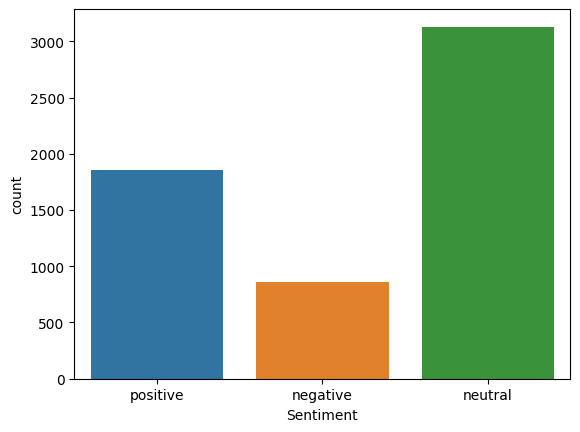

In [ ]:
sns.countplot(x='Sentiment', data = financial_sentiment_data)

In [ ]:
X = financial_sentiment_data['Sentence']
Y = financial_sentiment_data['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Preliminary Analysis with Simpler Models

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train.toarray(), Y_train)

multinomial_naive_bayes = MultinomialNB()
multinomial_naive_bayes.fit(X_train.toarray(), Y_train)

MultinomialNB()

In [ ]:
Y_pred = naive_bayes.predict(X_test.toarray())
accuracy_score(Y_test, Y_pred)

0.5208214489446663

In [ ]:
mult_y_pred = multinomial_naive_bayes.predict(X_test.toarray())
accuracy_score(Y_test, mult_y_pred)

0.6816885339418141

In [ ]:
from sklearn import svm

In [ ]:
svm_model = svm.SVC(kernel='rbf')#accuracy is .64 with linear kernel, .53 with polynomial
#svm_model.fit(X_train, Y_train)

In [ ]:
svm_model.fit(X_train, Y_train)

SVC()

In [ ]:
svm_pred = svm_model.predict(X_test)
accuracy_score(Y_test, svm_pred)

0.6622932116371933

We can display charts or tables for the preliminary models. The more complex models will be LSTM, LSTM to FFNN, Transformer... most models average around 60%, getting to 80 percent is the goal. 